In [1]:
from IPython.display import display

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd

import mglearn

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

from sklearn.datasets import load_iris

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import QuantileTransformer, StandardScaler

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() =='Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


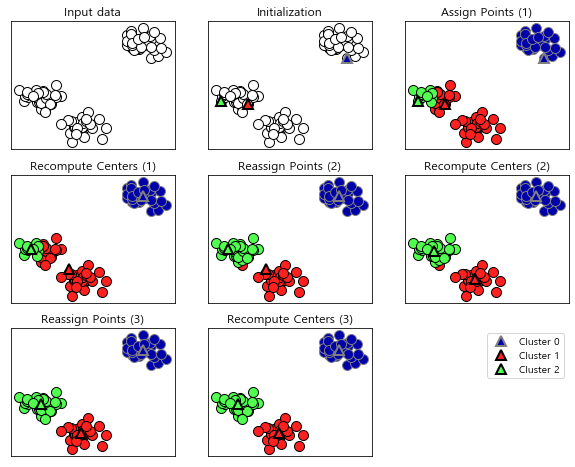

In [2]:
mglearn.plots.plot_kmeans_algorithm()

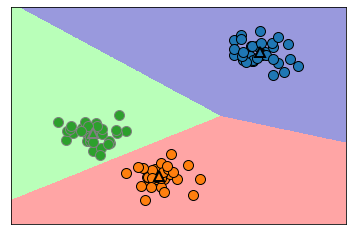

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [5]:
# 인위적으로 2차원 데이터를 생선한다.
X, y = make_blobs(random_state=1)

# 군집 모델을 만든다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
print('클러스터 레이블:\n{}'.format(kmeans.labels_))

클러스터 레이블:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [9]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


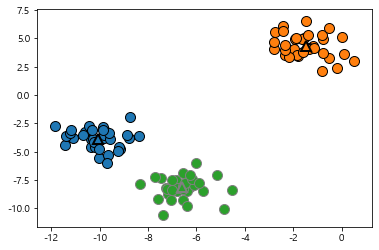

In [14]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
    markers='^', markeredgewidth=2)

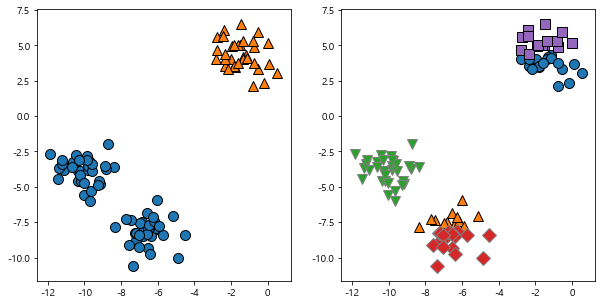

In [16]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

# 두 개의 클러스터 중심을 사용한다.
kmeans = KMeans(n_clusters =2)
kmeans.fit(X)
assignments =kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용한다.
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax= axes[1])

Text(0, 0.5, '특성 1')

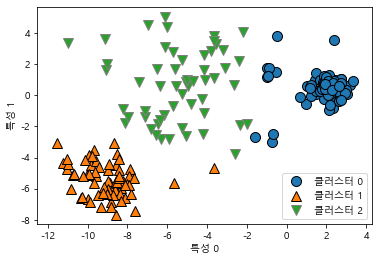

In [18]:
X_varied, y_varied = make_blobs(n_samples=200,
                               cluster_std=[1.0,2.5,0.5],
                               random_state = 170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(['클러스터 0', '클러스터 1', '클러스터 2'], loc = 'best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

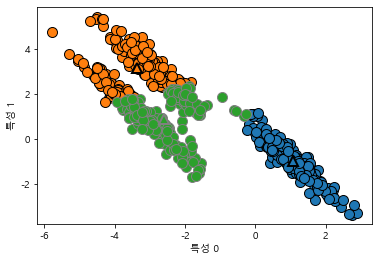

In [20]:
# 무작위로 클러스터 데이터를 생성한다.
X, y = make_blobs(random_state = 170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경한다.
transformation = rng.normal(size= (2,2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용한다.
kmeans = KMeans(n_clusters =3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타낸다
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
    markers='^', markeredgewidth=2)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

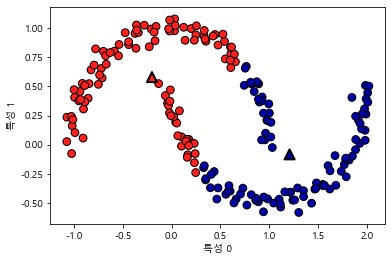

In [23]:
# tow_moons 데이터를 생선한다.
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise = 0.05, random_state = 0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용한다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#클러스터 할당과 클러스터 중심을 표시한다.
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap = mglearn.cm2, s=60, edgecolors = 'k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth= 2, 
           edgecolors='k')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

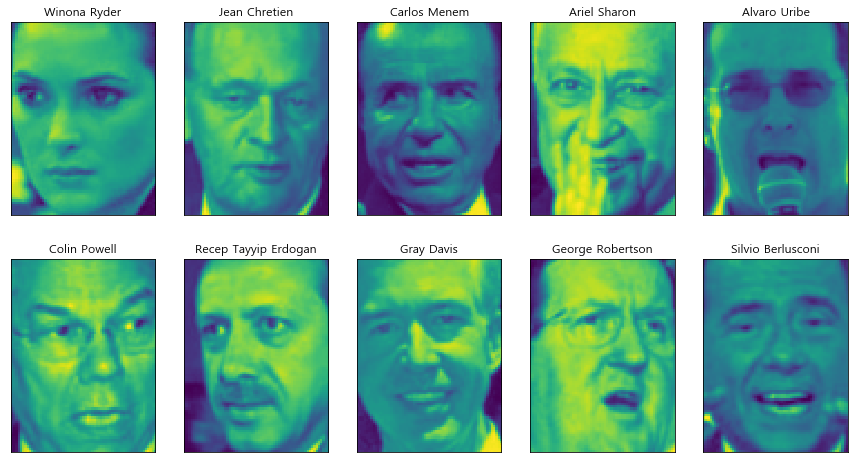

In [27]:
from sklearn.datasets import fetch_lfw_people
people =fetch_lfw_people(min_faces_per_person = 20, resize =0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2,5, figsize = (15,8),
                       subplot_kw= {'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [28]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] =1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 같습니다
X_people = X_people /255.

In [ ]:
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify = y_people, random_state=42)
nmf = NMF(n_components =100, random_state =0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans= KMeans(n_clusters=100, random_state = 0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf. transform(X_test), nmf.components_)

fig, axes = plt.subplots(3,5, figsize= (8,8), subplot_kw = {'xticks': (), 'yticks': ()})
fig.suptitle('추출한 성분')
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap = 'viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel('Kmeans')
axes[1,0].set_ylabel('pca')
axes[2,0].set_ylabel('nmf')
fig, axes = plt.subplots(4,5, subplot_kw = {'xticks': (), 'yticks': ()},
                        figsize= (8,8))
fig.suptitle('재구성')

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel('원본')
axes[1,0].set_ylabel('kmeans')
axes[2,0].set_ylabel('pca')
axes[3,0].set_ylabel('nmf')